<a href="https://colab.research.google.com/github/Gianuzzi/Proc_de_Img_-DD2020/blob/main/Ejercicio2.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Libs (no tocar)
import os
import sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    from subprocess import getoutput
    getoutput("git clone -l -s https://gist.github.com/Gianuzzi/8500100a094ade398c55b827e55c6a3a cloned-repo")
    os.chdir('cloned-repo')
    import libs_PI
    os.chdir('/content')
    
from libs_PI import *

# Carga de imagen

Se debe otorgar el ``path`` al archivo. Puede ser un path del ordenador, o la URL de la imagen.

En caso de que sea una URL, debe estar permitido el acceso a ella; de caso contrario, surgirá un error [HTTP_403](https://es.wikipedia.org/wiki/HTTP_403)

Por Default se intenta leer una imagen JPG; en caso de que sea otro formato, especificarlo. 

Formatos disponibles: **['png',  'jpeg', 'webp', 'bmp', 'dib', 'jpe', 'jp2',  'pbm', 'pgm', 'ppm', 'pxm', 'jpg', 'pnm']**

Se normaliza la imagen.
Tamaño de la imagen: (339, 602, 3)


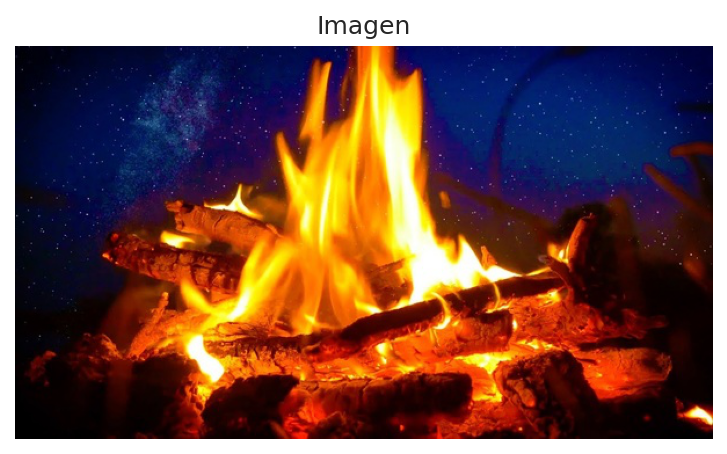

In [2]:
# Definir path y formato
path    = 'https://qph.fs.quoracdn.net/main-qimg-beba69820555091920fac923cff543da'
formato = 'jpg'


# Si estamos en colab, debe ser un URL.
if in_colab:
    from urllib.request import urlopen
    try:
        urlopen(path)
        getoutput("wget -O Imagen " + path)
        path = os.path.join(os.getcwd(), 'Imagen')
    except:
        print('No se pudo descargar la imagen.')
        print('Puede que la URL está mal escrita,'+ \
              ' o que el acceso a ella esté prohibido.')

# Cargamos el archivo
img = mpimg.imread(path, format=formato)

# Definimos RGB normalizado
if img.ravel().dtype not in (float, 'float32'): 
    print('Se normaliza la imagen.')
    img = img / 255.
if (len(img.shape)==3) and (img.shape[2]==4):
    img = RGBAtoRGB(img, verb=True)
print('Tamaño de la imagen:', img.shape) 

# Luminancias?
lum  = True if len(img.shape)==2 else False
if lum: print('Parece que la imagen no presenta colores.\n'+\
              'Se considera que es una imagen de luminancias.')
    
# Ploteo
plt.figure(dpi=150)
plt.title('Imagen')
plt.axis('off')
plt.imshow(img, plt.cm.gray)
plt.show()

# Cambio de tamaño

    Parámetros:
    ----------
        new_shape : Tamaño nuevo de la imagen buscada. 
                     Puede ser una tupla/lista/array con 2
                     elementos (Alto, Ancho) correspondientes
                     al tamaño nuevo, o puede ser un escalar
                     correspondiente al factor de multiplicación
                     de tamaño de la imagen original. También
                     puede ser un string de con formato 'x{factor}'
                     (anteponiendo una x al factor). [Default='x1']
                     Ej: new_shape = [10, 7] # Tamaño nuevo: (10, 7)
                     Ej: new_shape = 1.5     # Tamaño nuevo: tamaño viejo * 1.5 
                     Ej: new_shape = 'x0.4'  # Tamaño nuevo: tamaño viejo * 0.4
                     (int, float, tuple, np.ndarray, str)
        method    : Método a utlizar.
                     Los disponibles son:
                     - 'nn', 'nearest', 'cercanos', 'vc'          # Vecinos cercanos
                     - 'linear', 'bilinear', 'lineal', 'bilineal' # Bilineal
                     - 'cubic', 'bicubic', 'cubico', 'bicubico'   # Bicúbico
                    (str)
        sp        : Utilizar el paquete de scipy.interpolate para
                     realizar las interpolaciones. Caja negra,
                     pero puede ser más rápido. (bool)
                     (En caso de realizaar una interpolación
                     bicúbica, sp debe ser True, ya que la 
                     implementación manual aún no está terminada.)
        verb      : Imprimir mensajes. (bool)

Tamaño original de la imagen:  (339, 602)
Tamaño final de la imagen   :  (1017, 1806)
Método de interpolación utilizado:  nearest


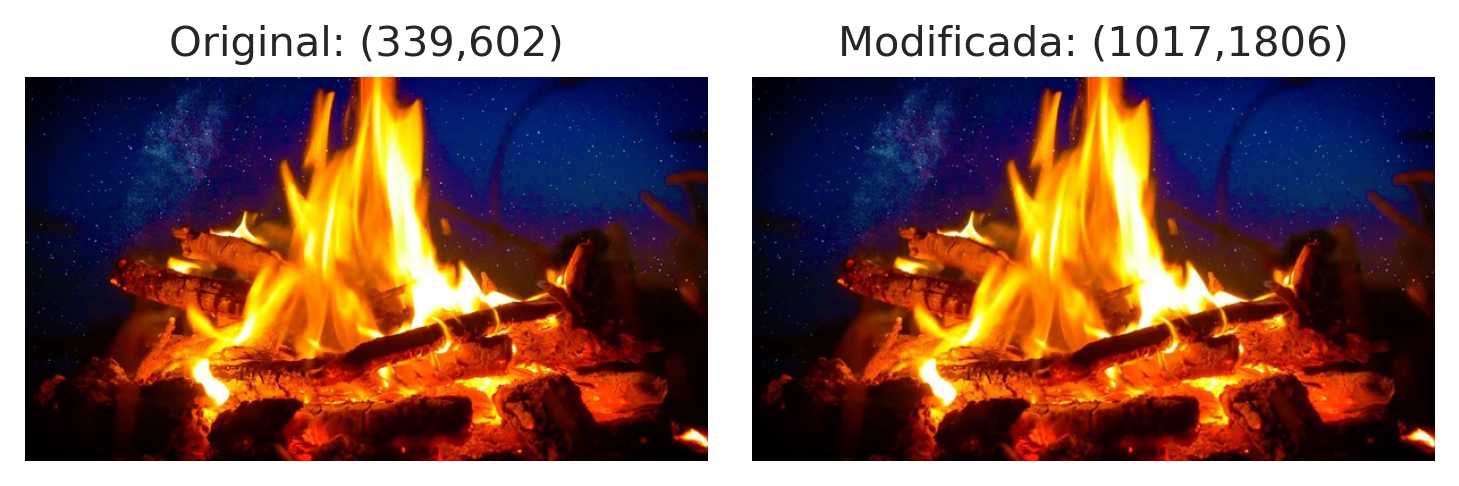

In [3]:
# Parámetros (Modificar a gusto)
new_shape = 3
method    = 'nearest'
sp        = False

# NO TOCAR
img_e = ApplyManual_Resize(img, sp=sp,
            new_shape=new_shape, method=method)

## Plot
plt.figure(dpi=250)
plt.subplot(1,2,1)
plt.title('Original: ({},{})'.format(
    img.shape[0], img.shape[1]))
plt.imshow(img, plt.cm.gray)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Modificada: ({},{})'.format(
    img_e.shape[0], img_e.shape[1]))
plt.imshow(img_e, plt.cm.gray)
plt.axis('off')
plt.tight_layout()
plt.show()

# Guardado

In [4]:
nombre  = 'IMG_Ej2.3'
formato = 'jpg'

if not in_colab:
    plt.imsave(nombre+'.'+formato,
               (img_e*255).astype('uint8'),
               cmap=plt.cm.gray)